In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/student_scores_em.csv')

scores = df['english']

scores
# 이 scores(영어성적)을 이용해서 여러가지 대표값들을 알아보아요
# 평균, 중위값(중앙값), 절사평균, 최대값, 최소값
# 변산성 -> 산포도
# 편차(deviation) -> 편차의 대푯값을 구할려고 해요!
# -> 편차의 평균을 대표값으로 사용하려고 했더니 -> 이 값이 0 이예요.
# 다른 대표값을 사용하려고 했죠. 방안이 2개 있어요!
# 1. 편차의 절대값을 구해서 이 값의 평균으로 편차의 대푯값을 사용!
#    -> MAD(Mean Absolute Deviation, 평균 절대 편차)
#    -> 미분이 안되는 지점이 존재 -> 미분을 이용하면 알고리즘을 사용할 수 없어요!
# 2. 편차의 제곱을 구해서 이 값의 평균으로 편차의 대푯값을 사용
#    분산 (Variance)
#    미분이 가능하고 수학적으로 놀리를 전개하기 편해요!
#    큰 편차에 대해 가중치를 부여할 수 있어요
#    - 분산은 2가지 방법으로 구할 수 있어요
#    - 표본분산(일반적으로 말하는 분산)
#    - 불편분산(분산으로 모분산을 추정할 때 사용하는 개념)
#      표본분산은 항상 모분산보다 값이 작게 도출!
#      분산에 제곱근을 취해서 데이터의 단위를 맞춰줘요! => 표준편차
#      standard deviation (표준편차)를  일반적인 산포도 지표로 이용해요!
# 추가적으로 다른 산포도 지표도 있어요!
# Range(아주 단순하고 직관적, 이상치에 아주 민감)
# 사분위를 이용한 범위를 구해서 산포도 지표로 사용
# IQR (사분위 범위 : 3사분위 ~ 1사분위) IQR value : Q3 - Q1(값.)

# 분포 모양에 따라서 지표가 2가지 존재!
# 왜도 (데이터의 치우침, 데이터의 대칭)
# 왜도값이 0이면 대칭구조 (정규분포) 데이터가 대칭을 이루고 있는 경우 -> 좋은 경우
# 왜도 값이 (+) 꼬리가 오른쪽으로 길다. 왼쪽에 머리가 있어요.
# 데이터가 왼쪽에 치우쳐 있어요!(소득분포)
# 왜도값이 (-)이면 꼬리가 왼쪽으로 길어요~. 은퇴연령분포가 이 경우에 해당
# 값으로는 어떻게 판단해야 하나요?
# 0에 근접할 수록 이상적
# 0 ~ +.- 0.5 => 거의 대칭. 분석과 데이터학습에 큰 문제가 되지 않아요
# +-0.5 ~ +-1 => 데이터의 치우침이 있어요!
# +- 1 이상 => 데이터의 상당히 치우침이 있어요! -> 사용못함

# 첨도 ()

# 정규화 (Normalization) - 표쥰화(standardization)

0     42
1     69
2     56
3     41
4     57
5     48
6     65
7     49
8     65
9     58
10    46
11    59
12    68
13    54
14    50
Name: english, dtype: int64

In [2]:
# 단변수(영어성적)에 대해 시각화를 알아보아요!

print(scores.describe())

# 데이터의 분포 상태를 표로 나타낼 수 있고 그래프로 나타낼 수 있어요!

# 데이터가 최하는 값을 몇개의 구간으로 나누고
# 각 구간에 몇개의 데이터가 포함되어 있는지를 세어서
# 표로 정리할 수 있어요!
# 이렇게 만든 표를 도수분포표(frequency distribution talbe)라고 해요!

# 예를 들어, 시험점수를 0 ~ 10 구간, 10 ~ 20 구간, 20 ~ 30구간, .... 이렇게 구간을
# 나눌꺼예요~ 그리고 각 구간에 몇명이 포함되는지를 표로 만들어보아요
# - class(계급) => 0 ~ 10 각각의 구간을 class 라고 해요
# - frequency(도수) => 각 class 안에 속한 데이터 개수
# - class interval => class의 폭 
# - 계급수 => class 클래스의 개수

count    15.000000
mean     55.133333
std       9.070097
min      41.000000
25%      48.500000
50%      56.000000
75%      62.000000
max      69.000000
Name: english, dtype: float64


In [3]:
# 영어성적으로 도수분포표를 구현해보았어요!

freq, divider = np.histogram(scores, bins=10, range = (0,100))

display(freq)
display(divider)

# 이 값을 이용해서 그럴듯 하게 도수분포표를 만들어보아요
# DataFrame()으로 만들어보아요

freq_class = [str(i) + '~' + str(i+10) for i in range(0, 100, 10)]

df = pd.DataFrame({'Frequency' : freq},
                  index = freq_class)

df

array([0, 0, 0, 0, 5, 6, 4, 0, 0, 0])

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

,Frequency
0~10,0
10~20,0
20~30,0
30~40,0
40~50,5
50~60,6
60~70,4
70~80,0
80~90,0
90~100,0


In [4]:
# 이렇게 도수분포표를 만들 수 있어요
# class : 각각의 구간
# frequency : 각 구간 안에 포함된 데이터의 수 (도수, 빈도수)
# class interval : class의 폭
# 계급수 : class의 개수
# class mark(계급값) : 각 class의 중앙값

# relative frequency (상대도수) : 각 class의 데이터가 어느 정도 비율을 차지하고 있는지

# cumulative relative frequency(누적 상대 도수)

class_mark = [((i + (i+10))/2)for i in range(0, 100 , 10)]
df['class_mark'] = class_mark

# 상대 도수와 누적 상대도수도 class mark와 유사하게 처리해 보세요!
rel_freq = df['Frequency'] / df['Frequency'].sum()
df['relative frequency'] = rel_freq

df['누적 relative frequency'] = np.cumsum(rel_freq)
df

,Frequency,class_mark,relative frequency,누적 relative frequency
0~10,0,5.0,0.000000,0.000000
10~20,0,15.0,0.000000,0.000000
20~30,0,25.0,0.000000,0.000000
30~40,0,35.0,0.000000,0.000000
40~50,5,45.0,0.333333,0.333333
50~60,6,55.0,0.400000,0.733333
60~70,4,65.0,0.266667,1.000000
70~80,0,75.0,0.000000,1.000000
80~90,0,85.0,0.000000,1.000000
90~100,0,95.0,0.000000,1.000000


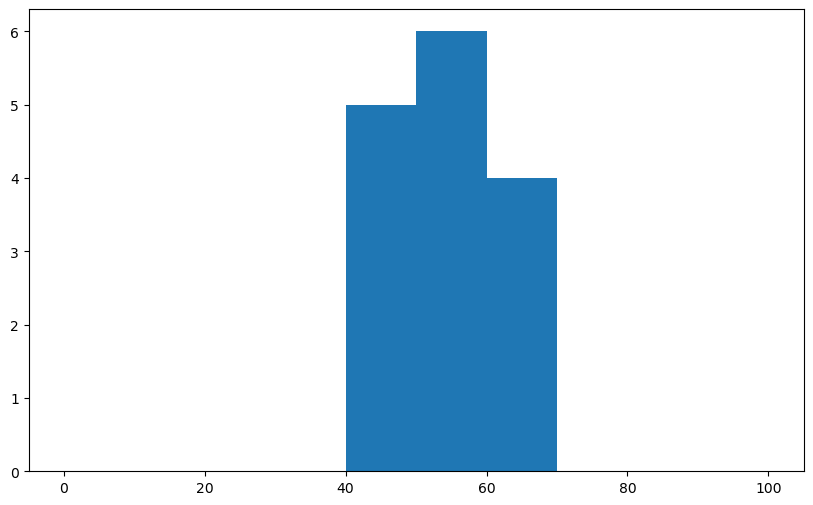

In [10]:
# 도수분포표를 그림으로 그려보아요
# histogram 그래프를 그리면 되요

scores

# 그림을 그릴꺼예요
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6)) # 도화지 만들어요!(Figure 객체 생성)
ax = fig.add_subplot(1,1,1) # 그림을 1개만 그릴거예요 축 1개만 생성

ax.hist(scores, bins=10, # 적절한 bins의 갯수를 설정 필요, 값에 따라 그래프의 모양 달라짐
        range=(0,100))

plt.show()

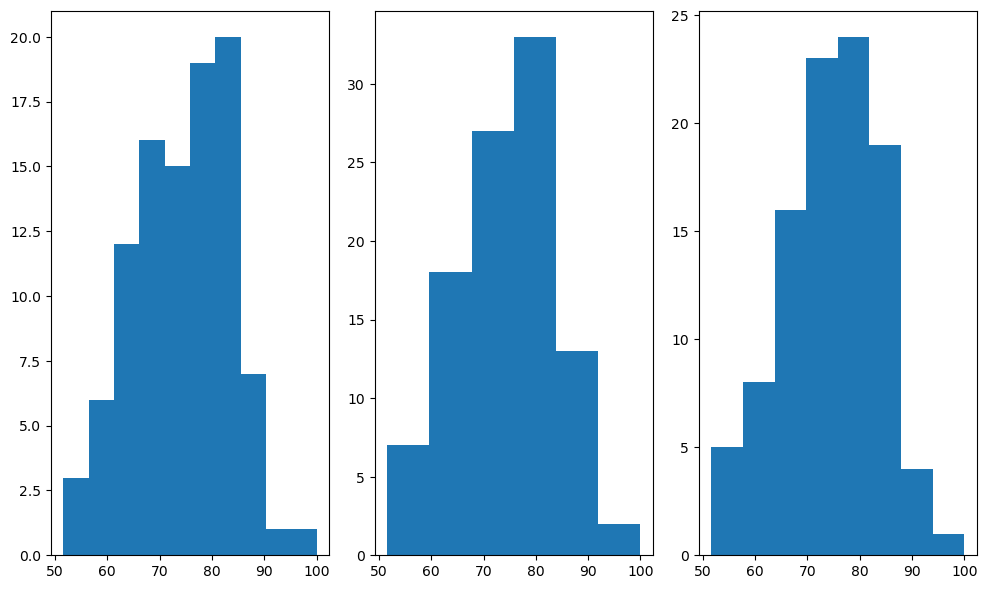

In [6]:
# histogram을 그릴때 한가지 주의해야 할 점은
# bins의 개수를 지정하는거예요
# 모양이 달라지기 때문
# 일반적으로 데이터에 따라서 적절한 값으로 bins의 개수를 설정하는게 좋아요!

# CSV(100명의 영어성적)를 이용해서
# Histogram을 그릴꺼예요! 그림 3개를 가로방향으로 이어서 그릴거예요!
# 각각의 방법을 이용해서 Histogram을 그려보세요!

import matplotlib.pyplot as plt

df = pd.read_csv('./data/english_scores_100_samples.csv')

fig = plt.figure(figsize=(10,6)) # 도화지 만들어요!(Figure 객체 생성)
ax1 = fig.add_subplot(1,3,1) # 그림을 1개만 그릴거예요 축 1개만 생성
ax2 = fig.add_subplot(1,3,2) 
ax3 = fig.add_subplot(1,3,3) 

k_sqrt = int(np.sqrt(len(df['English Score'])))

sigma = np.std(df['English Score'])
h_scott = 3.5 * sigma / (len(df['English Score']) ** (1/3))
k_scott = int((np.max(df['English Score']) - np.min(df['English Score'])) / h_scott)

# 3. Freedman–Diaconis Rule
q75, q25 = np.percentile(df['English Score'], [75, 25])
iqr = q75 - q25
h_fd = 2 * iqr / (len(df['English Score']) ** (1/3))
k_fd = int((np.max(df['English Score']) - np.min(df['English Score'])) / h_fd)


ax1.hist(df['English Score'], bins=k_sqrt) # 적절한 bins의 갯수를 설정 필요, 값에 따라 그래프의 모양 달라짐
ax2.hist(df['English Score'], bins=k_scott) # 적절한 bins의 갯수를 설정 필요, 값에 따라 그래프의 모양 달라짐
ax3.hist(df['English Score'], bins=k_fd) # 적절한 bins의 갯수를 설정 필요, 값에 따라 그래프의 모양 달라짐

plt.tight_layout()
plt.show()

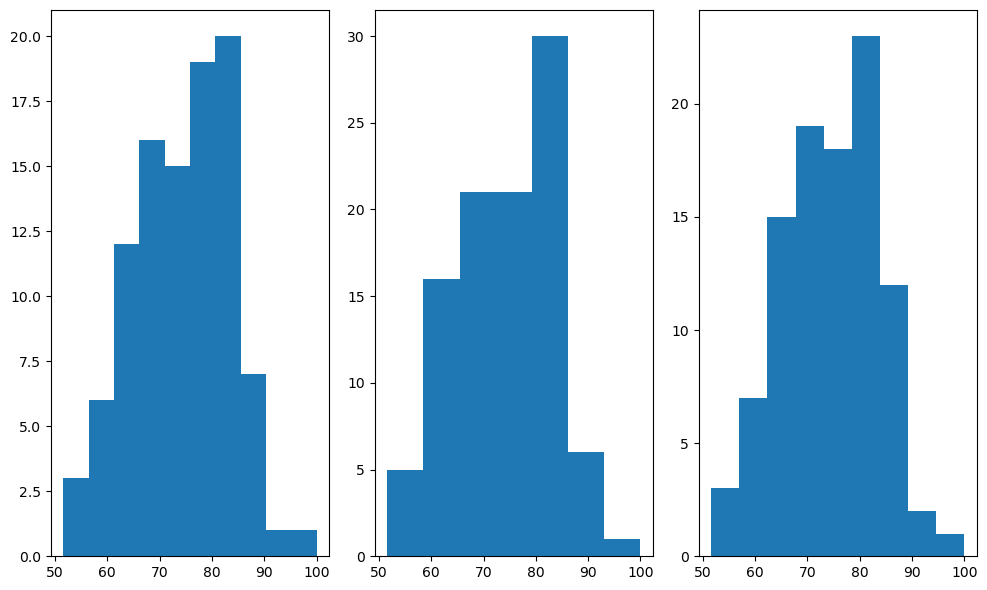

In [7]:
# 강사님 코드

import matplotlib.pyplot as plt

df = pd.read_csv('./data/english_scores_100_samples.csv')

n = df.shape[0]

scott_interval = (3.5 * np.std(df['English Score'])) / (n ** (1/3))
max = df['English Score'].max()
min = df['English Score'].min()

scott_class_num = int(np.ceil((max - min) / scott_interval))
scott_class_num # 7

Q3 = np.percentile(df['English Score'], 75)
Q1 = np.percentile(df['English Score'], 25)

freedman_interval = (2 * (Q3 - Q1)) / (n ** (1/3))
freedman_class_num = int(np.ceil((max - min) / freedman_interval))
freedman_class_num # 9

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df['English Score'], 
         bins=int(np.sqrt(n)))
ax2.hist(df['English Score'], 
         bins=scott_class_num)
ax3.hist(df['English Score'], 
         bins=freedman_class_num)

plt.tight_layout()
plt.show()

In [8]:
# 여기까지해서
# 단변수(1차원 변수, 변수 1개짜리)에 대한 대표값, 시각화에 대해서 알아보았어요!


# 2변수(2차원 변수)에 대한 대푯값, 시각화에 대해서 알아보면되요!
# 이거하기 전에 연습문제 좀 하고가요!!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/student_life_data.csv')
df.shape # (150, 17)

# 제일 먼저 해야 할 일은?
# 1. df.head(), df.info(), df.describe() 로 데이터 구조 확인
display(df.head())
display(df.info())
display(df.describe())




,학생ID,나이,성별,전공,일일공부시간,수학점수,영어점수,과학점수,수면시간,주간운동시간,생활만족도,학습만족도,출석일수,아르바이트,통학시간,월용돈,평균점수
0,ST001,20,여성,공학,4.8,73.5,54.7,48.6,5.3,3.9,3,3,74,없음,50,NaN,58.9
1,ST002,25,남성,경영,8.8,91.2,78.7,87.5,5.7,0.6,4,3,68,없음,30,45.0,85.8
2,ST003,22,남성,경영,4.0,100.0,85.1,84.0,7.8,0.0,5,1,64,있음,30,38.0,89.7
3,ST004,21,남성,인문,2.0,98.9,79.3,67.4,4.3,0.4,4,4,72,있음,40,20.0,81.9
4,ST005,19,기타,인문,4.8,100.0,97.1,100.0,7.3,0.0,5,3,70,없음,60,33.0,99.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학생ID    150 non-null    object 
 1   나이      150 non-null    int64  
 2   성별      150 non-null    object 
 3   전공      147 non-null    object 
 4   일일공부시간  142 non-null    float64
 5   수학점수    145 non-null    float64
 6   영어점수    150 non-null    float64
 7   과학점수    150 non-null    float64
 8   수면시간    150 non-null    float64
 9   주간운동시간  138 non-null    float64
 10  생활만족도   150 non-null    int64  
 11  학습만족도   150 non-null    int64  
 12  출석일수    150 non-null    int64  
 13  아르바이트   150 non-null    object 
 14  통학시간    150 non-null    int64  
 15  월용돈     140 non-null    float64
 16  평균점수    150 non-null    float64
dtypes: float64(8), int64(5), object(4)
memory usage: 20.0+ KB


None

,나이,일일공부시간,수학점수,영어점수,과학점수,수면시간,주간운동시간,생활만족도,학습만족도,출석일수,통학시간,월용돈,평균점수
count,150.000000,142.000000,145.000000,150.000000,150.000000,150.000000,138.000000,150.000000,150.000000,150.000000,150.000000,140.000000,150.000000
mean,20.900000,4.578169,75.697241,63.388667,63.328000,6.521333,2.157971,3.320000,3.033333,68.186667,43.133333,40.864286,67.082667
std,1.816221,2.758330,19.585475,18.725436,22.213087,1.748541,2.468393,1.051174,1.137622,8.919767,23.944473,19.457835,16.987298
min,18.000000,0.700000,14.000000,10.100000,8.300000,3.000000,0.000000,1.000000,1.000000,41.000000,10.000000,20.000000,18.600000
25%,20.000000,2.525000,65.400000,50.925000,48.700000,5.225000,0.225000,3.000000,2.000000,64.000000,30.000000,26.000000,56.850000
50%,21.000000,4.050000,79.200000,64.100000,64.350000,6.500000,1.200000,3.000000,3.000000,70.000000,40.000000,35.500000,67.950000
75%,22.000000,5.950000,90.900000,74.600000,79.900000,7.600000,3.575000,4.000000,4.000000,74.000000,50.000000,50.250000,79.375000
max,26.000000,12.500000,100.000000,100.000000,100.000000,11.000000,10.500000,5.000000,5.000000,80.000000,120.000000,132.000000,100.000000


In [45]:
# 2. 결측치 찾기
display(df.isnull().sum()) # 결측치 확인
missing_counts = df.isna().sum()

missing_df = pd.DataFrame({
    '변수명' : missing_counts.index,
    '결측치개수' : missing_counts.values
}) # DataFrame으로 만들어야 가공하기 편해서 생성
# 결측치 개수가 0보다 큰 행동들만 추출

display(missing_df.loc[missing_df['결측치개수'] > 0]) # 결측치 있는것만 확인

# 이렇게 결측치가 있는 컬럼과 결측치 개수를 확인할 수 있어요!
display(df.info())
display(df.head())

# 전공 -> object -> 범주형 -> 결측치 처리를 어떻게 할까요? -> mode(최빈값)
# 일일 공부시간 -> float64 -> 실수형 -> 결측치 어떻게 처리 -> 
# 왜도를 체크해서 왜도 값이 (+-)0.5보다 작으면 평균사용, 0.5보다 크면 중위값 사용
# 나머지는 다 실수값이니 일일 공부시간과 마찬가지여서 왜도를 체크해서 중앙값 혹은 평균으로 대체

# 전공에 대한 결측치부터 해결해 보아요!
df['전공'].mode() # => 공학이 빈도수가 가장 많아요
df['전공'].fillna((df['전공'].mode()).values[0], inplace=True)

학생ID       0
나이         0
성별         0
전공         0
일일공부시간     0
수학점수       5
영어점수       0
과학점수       0
수면시간       0
주간운동시간    12
생활만족도      0
학습만족도      0
출석일수       0
아르바이트      0
통학시간       0
월용돈       10
평균점수       0
dtype: int64

,변수명,결측치개수
5,수학점수,5
9,주간운동시간,12
15,월용돈,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학생ID    150 non-null    object 
 1   나이      150 non-null    int64  
 2   성별      150 non-null    object 
 3   전공      150 non-null    object 
 4   일일공부시간  150 non-null    float64
 5   수학점수    145 non-null    float64
 6   영어점수    150 non-null    float64
 7   과학점수    150 non-null    float64
 8   수면시간    150 non-null    float64
 9   주간운동시간  138 non-null    float64
 10  생활만족도   150 non-null    int64  
 11  학습만족도   150 non-null    int64  
 12  출석일수    150 non-null    int64  
 13  아르바이트   150 non-null    object 
 14  통학시간    150 non-null    int64  
 15  월용돈     140 non-null    float64
 16  평균점수    150 non-null    float64
dtypes: float64(8), int64(5), object(4)
memory usage: 20.0+ KB


None

,학생ID,나이,성별,전공,일일공부시간,수학점수,영어점수,과학점수,수면시간,주간운동시간,생활만족도,학습만족도,출석일수,아르바이트,통학시간,월용돈,평균점수
0,ST001,20,여성,공학,4.8,73.5,54.7,48.6,5.3,3.9,3,3,74,없음,50,NaN,58.9
1,ST002,25,남성,경영,8.8,91.2,78.7,87.5,5.7,0.6,4,3,68,없음,30,45.0,85.8
2,ST003,22,남성,경영,4.0,100.0,85.1,84.0,7.8,0.0,5,1,64,있음,30,38.0,89.7
3,ST004,21,남성,인문,2.0,98.9,79.3,67.4,4.3,0.4,4,4,72,있음,40,20.0,81.9
4,ST005,19,기타,인문,4.8,100.0,97.1,100.0,7.3,0.0,5,3,70,없음,60,33.0,99.0


In [44]:
# 일일 공부시간 결측치 처리
# 평균으로 할건지 중위값으로 할건지... skewness(왜도)로 판단
from scipy import stats

tmp_series = df['일일공부시간'].dropna()

stats.skew(tmp_series) # 0.9408278579103061
# 왜도 값을 확인했는데 거의 1에 근접, 데이터가 대칭이 아니고
# 한쪽으로 치우쳐져 있어요!
# 평균이 왜곡될 수 있어요 -> 중위 값이 조금 더 안전한 대표값

study_hour = tmp_series.median()
study_hour # 4.05

df['일일공부시간'].fillna(study_hour, inplace= True)

/tmp/ipykernel_38669/1887009545.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['일일공부시간'].fillna(study_hour, inplace= True)


## 연습문제

데이터는 student_life_data_cleaned.csv 사용

In [53]:
# 1. 전체학생 150명의 수학 점수에 대한
# 평균, 중앙값, 최빈값을 각 각 구하시오.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/student_life_data_cleaned.csv')

# 수학점수 평균 : 75.814
print(df['수학점수'].mean())
# 수학점수 중위 : 79.2
print(df['수학점수'].median())
# 수학점수 최빈값 : 100.0
print(df['수학점수'].mode()[0])

75.814
79.2
100.0


In [ ]:
# 2. 성별에 따른 평균점수의 차이를 분석하세요.
# 남학생과 여학생의 평균점수를 각각 구하고,
# 어느 그룹의 평균점수가 더 높은지 확인하세요.

# 1) groupby
print(df.groupby('성별')['평균점수'].mean())
# 남성    69.205405
# 여성    64.920548

# 2) Boolean indexing
display(df.loc[df['성별'] == '남성', '평균점수'].mean())
# 69.2054054054054

display(df.loc[df['성별'] == '여성', '평균점수'].mean())
# 64.92054794520547

성별
기타    67.333333
남성    69.205405
여성    64.920548
Name: 평균점수, dtype: float64


np.float64(69.2054054054054)

np.float64(64.92054794520547)

In [81]:
# 전공별로 일일공부시간의 평균을 구하고,
# 어느 전공의 학생들이 가장 많은 시간을
# 공부하는지 확인하세요.

major_series = df.groupby('전공')['일일공부시간'].mean()
print(major_series)

display(major_series.sort_values(ascending=False))

전공
경영      4.498684
공학      5.345652
예술      4.683333
의학      3.633333
인문      4.183333
자연과학    3.566667
Name: 일일공부시간, dtype: float64


전공
공학      5.345652
예술      4.683333
경영      4.498684
인문      4.183333
의학      3.633333
자연과학    3.566667
Name: 일일공부시간, dtype: float64

In [ ]:
# 출석일수의 사분위수(Q1, Q2, Q3)를 구하고,
# IQR Value를 계산하세요!
q75, q50, q25 = np.percentile(df['출석일수'], [75, 50, 25])
print(q25, q50, q75) # 64.0 70.0 74.0

IQR_Value = q75 - q25
print(IQR_Value) # 10.0

64.0 70.0 74.0
10.0


In [ ]:
# 수면시간이 7시간 이상인 학생들의 평균점수와 학생수를
# 7시간 미만인 학생들의 평균점수의 평균과 학생수를 비교하세요.
# boolean mask 문제

sleep_7_above = df.loc[df['수면시간'] >= 7, '평균점수']
sleep_7_below = df.loc[df['수면시간'] < 7, '평균점수']

print(sleep_7_above.mean(), sleep_7_above.count())
# 69.45357142857142 56

print(sleep_7_below.mean(), sleep_7_below.count())
# 65.67021276595744 94

69.45357142857142 56
65.67021276595744 94


In [103]:
# 수학점수, 영어점수, 과학점수 중 어느 과목의 점수 분포가
# 가장 고르게 분포되어 있는지 판단하세요
# 표준편차 문제

print(df['수학점수'].std()) # 19.264388085847617
print(np.std(df['수학점수'])) # 19.20006607627519

print(df['영어점수'].std()) # 18.725435942333228
print(np.std(df['영어점수'])) # 18.662913444106795

print(df['과학점수'].std()) # 22.213086776967163
print(np.std(df['과학점수'])) # 22.138919335264156

# 영어성적이 표준편차가 가장 낮다는건 다른 과목에 비해 평균에 더 고르게 분포 되어있다는 것

19.264388085847617
19.20006607627519
18.725435942333228
18.662913444106795
22.213086776967163
22.138919335264156


In [ ]:
# 주간운동시간의 표준편차를 구하고,
# 평균 ± 1 표준편차 범위(1 시그마) 내에 있는
# 학생의 비율을 계산하세요

stu_std = np.std(df['주간운동시간'])
# stu_std # 2.373278651055447

student_mean = np.mean(df['주간운동시간'])
# student_mean # 2.0813333333333333


lower_bound = student_mean - stu_std
upper_bound = student_mean + stu_std
print(lower_bound, upper_bound)
# -0.29194531772211363 4.45461198438878

(df.loc[df['주간운동시간'] < upper_bound]).shape[0] # 127

# 전체 학생에 대한 비율은
127 / df.shape[0] # 0.8466666666666667 => 85%의 학생이 1시그마 안에 위치
# 우리의 주간 운동시간은 첨도가 양수가 되면서 정규분포보다 더 뾰족한 형태를 만들어요
# 데이터가 평균에 몰려있다는 의미 + 꼬리부분은 두터워져요!
# 이상치가 존재할 확률이 높아져요!

# 정규분포의 1 시그마의 데이터 비율은 68%
# 정규분포의 2 시그마의 데이터 비율은 95.45%
# 정규분포의 3 시그마의 데이터 비율은 99.7%

-0.29194531772211363 4.45461198438878


0.8466666666666667